<center>
<h1 class = "title">ANR CORMORAN </h1>
<h1 class="title">Making Use of CorSer Class </h1>

<h2 class="title"><font color="#2201FF">Simultaneous acquisition of Radio Data and Motion Capture in Heterogeneous WBAN</font></h2>
<h3> N.Amiot, B.Uguen</h3>
<h3> Presentation available @ http://tinyurl.com/</h3>
</center>

In [1]:
%pylab inline
import  pylayers.util.mayautil as myu

Populating the interactive namespace from numpy and matplotlib


## Outline

1. [CORMORAN Measurement Campaign](#CORMORAN)
    1. [Motivation for creating a specific tool](#Motivation)
    2. [Prerequisite installations](#pre)
1. [The CorSer Class](#CorSer)
    1. [Load Serie](#Load)
    2. [Get information on the Series](#getinfo)
    3. [Available Data Variable](#Available Data)
        1. [Radio DataFrames](#Radio df)
        1. [Non Radio DataFrames](#Non Radio df)       
        3. [Involved Devices](#device)
    4. [Acessing the Data](#access data)
        1. [Get Device Position](#getdevp)
        2. [Get Link Value](#getlink)
        3. [Get Link Distance](#getlinkd)
    5. [Visualizing the data](#vizu)
        1. [Native Pandas Vizualization](#pandas)
        2. [Plot Method](#plot)
        3. [Plot Visibility Method](#plotvisi)
        4. [Plot Mobility Method](#plotmob)
        5. [3D plot](#3Dplot)
        6. [3D plot interactively](#3Dploti)
        7. [3D Interrative  Visibility](#visii)
        


<a id='CORMORAN'></a>
# CORMORAN Measurement Campaign
The CORMORAN measurement campaign is the **first known campaign** in the WBAN context gathering :

+ 3 differents radio technologies (HiKoB, CEA plateform and Beespoon phone)
+ Up to 24 radio devices equiped on a single body
+ A precise capture of the radio device and body movement using a Vicon motion capture (MOCAP) system.
+ A perfect knowledge of the capture environement
+ 58 Series with Capture or Group Navigation scenarios

One of the key aspect of this campaign is the use of a precise **motion capture** system which allows to get a ground truth position of any radio device which make the radio observable values open to **rich interpretation**. 



<a id='Motivation'></a>
## Motivation for creating a specific tool

In order to exploit the CORMORAN measurement campaign, a dedicated tool has been envisaged. Regarding that one aim of the CORMORAN project (http://pylayers.github.io/pylayers/cormoran.html) is to provide a simulation plateform from the Channel to the MAC Layer, the tool naturally takes place inside the PyLayers plateform.

This specific tool creation has been motivated by the high complexity of the the measurement campaign. 
First, no existing tool are able to exploit simultaneously the radio and MOCAP information from the measures.

The co-existence of **3 different radio technologies** implies 3 different file formats which have to be interpreted and combined together to be exploitable. However, the motion capture, and the 3 differents radio acces technologies (RAT) operating at different sample rate, which leads to manipulating **4 different time basis**. As well, no automatic start-synchronization mechanism was availble between the different technologies which leads to a non systematic time shift between the different basis.


<a id='pre'></a>
##Prerequisite Installations

Before starting using this tool, some requirements have to be satisfied.

1. The open source platform PyLayers ( http://www.pylayers.org ) has to be installed following the installation notes here: https://github.com/pylayers/pylayers/blob/master/INSTALL.txt 

2. The CORMORAN measurements have to be downloaded from the gitlab repository (URL PROVIDED SHORTLY)
3. An environement variable **$CORMORAN** has to be set at the root of your CORMORAN measurements directory (help about setup of environement variables can be found in pylayers' INSTALL.txt

Once those 3 steps have been fullfilled, the CORMORAN exploitation measure tool **CorSer** is ready to used. 

<a id='CorSer'></a>
## The CorSer Class

The exploitation of measures tool takes place as a specific class named **CorSer** (which stands for Cormoran Series).
Once **PyLayers** has been installed, it is possible to import the class in the working interactive environment.

In [2]:
from pylayers.measures.cormoran import *

<a id='getinfo'></a>
### Get information on the Series
Before creating the CorSer object it is possible to consult the available measurements series using *cor_log()*. Then for each **serie** of a given **day** it is possible to get:

+ The involved subject(s)
+ The radio technology
+ A short description of the serie

In [3]:
cor_log()

,serie,day,Subject,techno,Short Notes
0,1,11,Bernard,TCR,Subject Walk circularly
1,2,11,Bernard,TCR,Subject Walk circularly
2,3,11,Bernard,TCR,Subject Walk circularly
3,4,11,Bernard,TCR,Subject Walk circularly
4,5,11,Nicolas,HKB+BS,Subject Walk circularly
5,6,11,Nicolas,HKB+BS,Subject Walk circularly
6,7,11,Nicolas,HKB+BS,Subject Walk circularly
7,8,11,Nicolas,HKB+BS,Subject Walk circularly
8,9,11,Bernard,TCR,INTERRUPTED Subject Walk circularly ++ speed
9,10,11,Bernard,TCR,Subject Walk circularly ++ speed


<a id='Load'></a>
## Loading a Measurement Serie
As an example, serie 6 from day 11 can be loaded using the following command:

In [4]:
S=CorSer(serie=6,day=11)


load infrastructure node position: **** Processor coding : Intel-PC

load  Nicolas  body: **** Processor coding : Intel-PC

BS data frame index:  Align on mocap OK... WARNING time-offset NOT applied
No BS offset not yet set => use self.offset_setter 

HKB data frame index: Align on mocap OK... time-offset applied OK

Create distance Dataframe... OK


In [5]:
S.vlc()

Once loaded information about the serie (date, type, ...) can be obtained just by calling the object itself: 

In [6]:
S

Filename: Sc20_S6_R2_HKBS
Day : 11/06/2014
Serie : 6
Scenario : 20
Run : 2
Type : HKBS
Original Video Id : Single
Subject(s) : Nicolas 

Body available: True

BeSPoon : Sc20_S6_R2_HKBS.csv
HIKOB : Sc2_0_S6_r2_HKB_Single.mat

<a id='Available Data'></a>
## Available data

<a id='Radio df'></a>
### Radio DataFrames

Data frames are *Pandas* objects which can be interpreted as tables. 

+ Each line corresponds to a given timestamp
+ Each column corresponds to a given link between 2 radio devices

Depending on available RAT involved in the serie, different data frames are available:

+ HiKoB (HKB) data : *S.hkb*
+ BeSpoon data : *S.bespo*
+ TCR data : *S.tcr*

In the chosen example serie, only HiKoB and Bespoon are available. 

Here is an example of the RSS values obtained by the HKB sensors for the 120 available links and the 5 first available timestamp : 

In [7]:
S.hkb.head(10)

,AP1-AP2,AP1-AP3,AP1-AP4,AP1-HeadRight,AP1-TorsoTopRight,AP1-TorsoTopLeft,AP1-BackCenter,AP1-ElbowRight,AP1-ElbowLeft,AP1-HipRight,...,WristRight-WristLeft,WristRight-KneeLeft,WristRight-AnkleLeft,WristRight-AnkleRight,WristLeft-KneeLeft,WristLeft-AnkleLeft,WristLeft-AnkleRight,KneeLeft-AnkleLeft,KneeLeft-AnkleRight,AnkleLeft-AnkleRight
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.020002,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.030003,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.040004,-60,-64,-61,-71,-81,-73,-78,-79,-84,-73,...,-64,-88,-64,-55,-63,-61,-77,-60,-84,-79
0.050005,-59,-65,-60,-70,-81,-73,-78,-79,-84,-74,...,-63,-88,-64,-55,-63,-61,-75,-61,-84,-80
0.060006,-59,-65,-60,-70,-81,-73,-78,-79,-84,-74,...,-63,-88,-64,-55,-63,-61,-75,-61,-84,-80
0.070007,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80
0.080008,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80
0.090009,-60,-65,-61,-70,-80,-73,-78,-78,-83,-73,...,-63,-88,-64,-55,-63,-61,-75,-60,-84,-80


<a id='Non Radio df'></a>

### Non Radio DataFrames

Extra data frames are also available to acces to non radio information :

+ *S.devdf*: the device dataframe, which gives mechanical information: position (x,y,z), velocity ($v$,$v_x$,$v_y$,$v_z$) and acceleration ($a$,$a_x$,$a_y$,$a_z$) of the devices at any time stamps
+ *S.distdf*: the distance data frame, which gives ground truth distances (in meters) between the different radio links.

Below are the 5 last data of the device data frame...


In [8]:
S.devdf.tail(5)

,id,subject,x,y,z,v,vx,vy,vz,a,ax,ay,az
104.2,HKB:14,Nicolas,0.158588,-1.574102,0.526740,0.012375,-0.005046,0.010521,0.004119,2.241849,1.972888,0.738384,0.767065
104.2,HKB:1,,0.018552,-2.749937,0.979166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104.2,HKB:16,Nicolas,-0.229677,-1.445404,0.175125,0.010563,-0.007414,-0.006640,-0.003540,0.547761,0.122199,-0.250196,-0.471711
104.2,HKB:10,Nicolas,0.262695,-1.433168,1.143153,0.057829,-0.048329,-0.030039,-0.010302,0.924303,-0.697193,0.368582,-0.482085
104.2,HKB:3,,0.021135,3.375590,1.003871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


... and the 5 last data of the distance data frame:


In [9]:
S.distdf.tail(5)

,HKB:1-HKB:2,HKB:1-HKB:3,HKB:1-HKB:4,HKB:1-HKB:5,HKB:1-HKB:6,HKB:1-HKB:7,HKB:1-HKB:8,HKB:1-HKB:9,HKB:1-HKB:10,HKB:1-HKB:11,...,HKB:12-HKB:15,HKB:12-HKB:16,HKB:13-HKB:14,HKB:13-HKB:15,HKB:13-HKB:16,HKB:14-HKB:15,HKB:14-HKB:16,HKB:15-HKB:16,BS:0-BS:74,BS:0-BS:157
104.159996,6.102589,6.125578,6.135849,1.308815,1.163639,1.131707,1.387571,1.322510,1.350930,1.223406,...,1.071233,0.990922,0.411064,0.753501,0.910143,0.364396,0.539795,0.445009,1.046829,0.119864
104.169997,6.102589,6.125578,6.135849,1.309074,1.163713,1.131587,1.387549,1.322884,1.350486,1.223658,...,1.071489,0.990873,0.410944,0.753502,0.909901,0.364396,0.539682,0.445027,1.046903,0.119868
104.179998,6.102589,6.125578,6.135849,1.309470,1.163938,1.131414,1.387530,1.323230,1.350018,1.223874,...,1.071624,0.990832,0.410933,0.753522,0.909759,0.364316,0.539533,0.445038,1.046936,0.119734
104.189999,6.102589,6.125578,6.135849,1.309873,1.164064,1.131319,1.387509,1.323601,1.349608,1.224129,...,1.071955,0.990734,0.410871,0.753529,0.909520,0.364281,0.539368,0.445063,1.047000,0.119982
104.200000,6.102589,6.125578,6.135849,1.310357,1.164289,1.131228,1.387509,1.323915,1.349214,1.224341,...,1.072294,0.990736,0.410651,0.753482,0.909291,0.364271,0.539394,0.445110,1.046967,0.119830


<a id='device'></a>
### Involved devices (*S.dev*)

The *S.dev* command allows to obtain the complete list of devices involved in the serie and:

+ the **name of the device** used in the radio dataframe
+ the **real device Id** used during the measurement campaign
+ The corresponding **body device Id** used on the Body wear description
+ At wich **subject** the device is related.

Infrastrucure **<color=blue> access points</color>** do not have attribute related **subject**.

In [10]:
S.dev

Name in Dataframe     | Real Id | Body Id  | Subject    
AP4                   |       4 | HKB:4    |            
AP1                   |       1 | HKB:1    |            
AP2                   |       2 | HKB:2    |            
AP3                   |       3 | HKB:3    |            
--------------------------------------------------------          
AnkleRight            |      16 | HKB:16   | Nicolas    
KneeLeft              |      14 | HKB:14   | Nicolas    
AnkleLeft             |      15 | HKB:15   | Nicolas    
WristRight            |      12 | HKB:12   | Nicolas    
WristLeft             |      13 | HKB:13   | Nicolas    
ElbowLeft             |      10 | HKB:10   | Nicolas    
HipRight              |      11 | HKB:11   | Nicolas    
HeadRight             |       5 | HKB:5    | Nicolas    
TorsoTopRight         |       6 | HKB:6    | Nicolas    
TorsoTopLeft          |       7 | HKB:7    | Nicolas    
BackCenter            |       8 | HKB:8    | Nicolas    
ElbowRight           

<a id='access data'></a>
## Accessing the data


<a id='getdevp'></a>
### Get device position (*S.getdevp*)

The value of the device position at a specific time or range can be obtained by specifying: 

+ The device (Name in dataframe OR real id OR body id) 
+ The radio *techno* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the positions of the HKB radio node 11 (Hip Right), between 5.0 seconds and 5.2 seconds with:

In [11]:
tstart=5
tstop=35.2
Positions = S.getdevp(11,t=[tstart,tstop])
Positions

,x,y,z
5.000480,-0.139566,0.224905,1.016796
5.010481,-0.139553,0.224845,1.016826
5.020482,-0.139545,0.224825,1.016818
5.030483,-0.139564,0.224730,1.016849
5.040484,-0.139609,0.224642,1.016859
5.050485,-0.139580,0.224613,1.016898
5.060486,-0.139554,0.224586,1.016920
5.070487,-0.139604,0.224492,1.016937
5.080488,-0.139545,0.224452,1.016989
5.090489,-0.139521,0.224391,1.016992


**NOTE : You may also obtain a classical numpy array instead of this Pandas object by using the "*values*" method :**


In [12]:
Positions.values

array([[-0.13956557,  0.22490462,  1.01679608],
       [-0.13955284,  0.22484492,  1.01682581],
       [-0.13954524,  0.22482529,  1.01681787],
       ..., 
       [-2.65457251, -1.42718103,  0.99395471],
       [-2.66234253, -1.42497827,  0.99561066],
       [-2.67032446, -1.42281226,  0.99720032]])

<a id='getlink'></a>
### Get link value (*S.getlink*)

The value of a link *a* and *b* at a specific time or range or time can be obtained by specifying:

+ The device $a$ (Name in dataframe OR real id OR body id) 
+ The device $b$ (Name in dataframe OR real id OR body id) 
+ The radio *technoa* and *technob* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right) , between 5 seconds and 5.2 seconds with:

In [13]:
Values = S.getlink(11,16,t=[tstart,tstop])
Values

5.000500   -67
5.010501   -67
5.020502   -67
5.030503   -67
5.040504   -67
5.050505   -67
5.060506   -67
5.070507   -67
5.080508   -67
5.090509   -67
5.100510   -67
5.110511   -67
5.120512   -67
5.130513   -67
5.140514   -67
...
35.053505   -83
35.063506   -83
35.073507   -78
35.083508   -78
35.093509   -78
35.103510   -77
35.113511   -77
35.123512   -79
35.133513   -79
35.143514   -79
35.153515   -76
35.163516   -76
35.173517   -79
35.183518   -79
35.193519   -79
Name: HipRight-AnkleRight, Length: 3020, dtype: float64

<a id='getlinkd'></a>
### Get link distance (*S.getlinkd*)


The ground truth distance separating a device **a** from a device **b** at a specific time or range or time can be obtained by specifying:

+ The device $a$ (Name in dataframe OR real id OR body id) 
+ The device $b$ (Name in dataframe OR real id OR body id) 
+ The radio *technoa* and *technob* (Precising the RAT is optional except when an ambiguity occurs, therefore error is raised)
+ a given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

Hence, It is possible to get the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right), between 5 seconds and 5.2 seconds with:


In [14]:
Distances = S.getlinkd(11,16,t=[tstart,tstop])
Distances

5.000480    0.845013
5.010481    0.845034
5.020482    0.845045
5.030483    0.845068
5.040484    0.845090
5.050485    0.845180
5.060486    0.845229
5.070487    0.845235
5.080488    0.845309
5.090489    0.845339
5.100489    0.845353
5.110490    0.845423
5.120491    0.845482
5.130492    0.845559
5.140493    0.845563
...
35.053364    0.829778
35.063365    0.829984
35.073366    0.830430
35.083367    0.830784
35.093368    0.831789
35.103369    0.833180
35.113370    0.834539
35.123371    0.835911
35.133372    0.837093
35.143373    0.838183
35.153374    0.839215
35.163375    0.839977
35.173376    0.840650
35.183377    0.841065
35.193377    0.841798
Name: HKB:11-HKB:16, Length: 3020, dtype: float64

<a id='vizu'></a>
## Visualizing the Data

<a id='pandas'></a>
### Native Pandas Vizualization

Because radio data in **CorSer** are stored into **Pandas** objects, convenient vizualization method are directly available. Most of them can be found here : http://pandas.pydata.org/pandas-docs/stable/visualization.html

<a id='plotting'></a>
## Plotting the Data


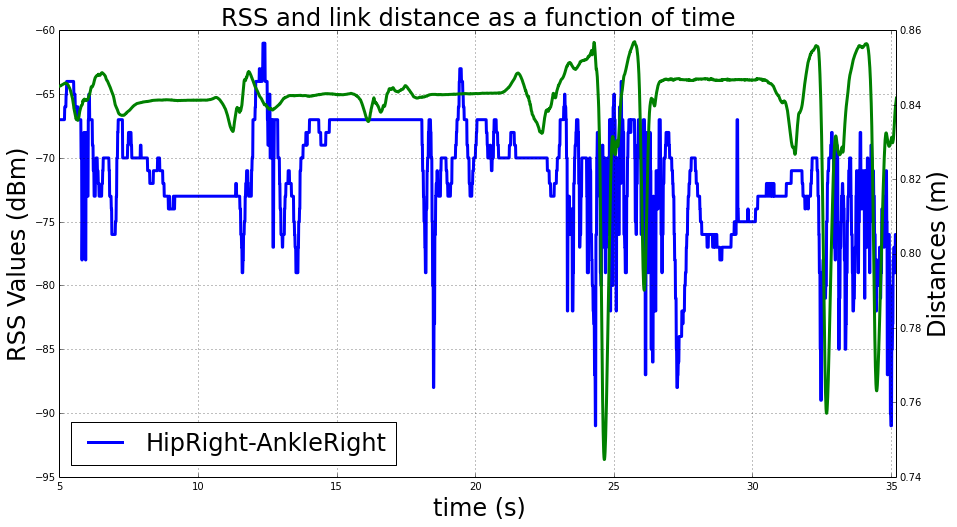

In [15]:
# Ploting 
fig=figure(figsize=(15,8))
ax=Values.plot(linewidth=3) # plot values
l=Distances.plot(secondary_y=True,ax=ax,linewidth=3) # plot distances on the right side
## Labelling 
ax.legend(loc='best',fontsize=24) # add legend box
ax.set_ylabel('RSS Values (dBm)',fontsize=24) # set left ylabel
ax.right_ax.set_ylabel('Distances (m)',fontsize=24) # set right ylabel
ax.set_xlabel('time (s)',fontsize=24) # set xlabel
ax.set_title('RSS and link distance as a function of time',fontsize=24)

CorSer also provides specific plotting methods which includes extra features.

<a id='plot'></a>
### Plot method (S.plot)

The plot function allows to display the radio values of a link. 
The main parameters are always the same:

+ The device $a$ (Name in dataframe OR real id OR body id) 
+ The device $b$ (Name in dataframe OR real id OR body id) 
+ The radio *techno* (Precising the techno is optional except when an ambiguity occurs, therefore error is raised)
+ A given time in second or a [start time,stop time]. If no time is given, the position for all time stamps are provided

More option are availble, please refer to the docstring (*S.plot?*) for more information

#### Plot values 
Continuing with the same example, it is possible to plot the HKB values between radio node 11 (Hip Right) and node 16 (Ankle Right) , between x seconds and y seconds with:

In [16]:
# plot value
fig=figure(figsize=(15,8))
f,ax = S.plot(11,16,t=[tsart,tstop],color ='b',title=False,fig=fig)

# create right axis
ax2=ax.twinx()

# plot distance
S.plot(11,16,t=[tstart,tstop],color ='g',title=False,
       distance=True,
       fig=f,ax=ax2)
ax.set_xlabel('time (s)',fontsize=18) # set xlabel

NameError: name 'tsart' is not defined

<a id='plotvisi'></a>
### Plot visibility method (S.pltvisi)

In order to go further in the radio value interpretation, it is convenient to have some extra information about the **optical visibility/occultation** of devices involved in a link.

This information allows to determine the line of sight (LOS) or non line of sight (NLOS) cases which are crutial for power level and delay interpretation.

This information can be superimposed to the radio values. To this end, the plot visibility (*S.pltvisi*) method is used. 
The **hatched** area denoted **NLOS** wheras **clear** area denotes **LOS**.

Parameters are the same than those the *plot* method:
 

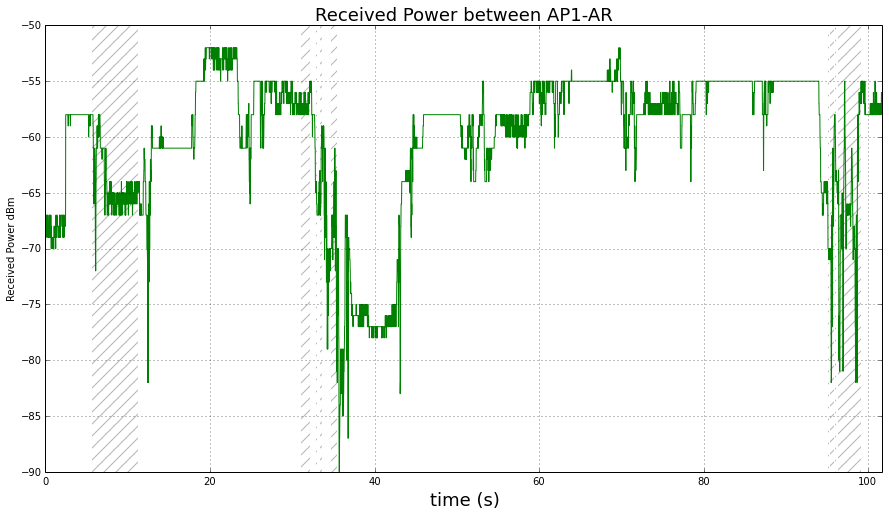

In [93]:
fig=figure(figsize=(15,8))
f,ax = S.plot(1,16,fig=fig)
S.pltvisi(1,16,fig=f,ax=ax)
ax.set_xlabel('time (s)',fontsize=18) # set xlabel

<a id='plotmob'></a>
### Plot mobility method (S.pltmob)

As well it is possible to determine and indicate whether the subject is static or not by using the plot mobility method (**S.pltmob**). 
The succession of Static and Mobile sequences are denoted $S_x$ and $M_x$ resplectively, where $x$ is an index of the sequence.

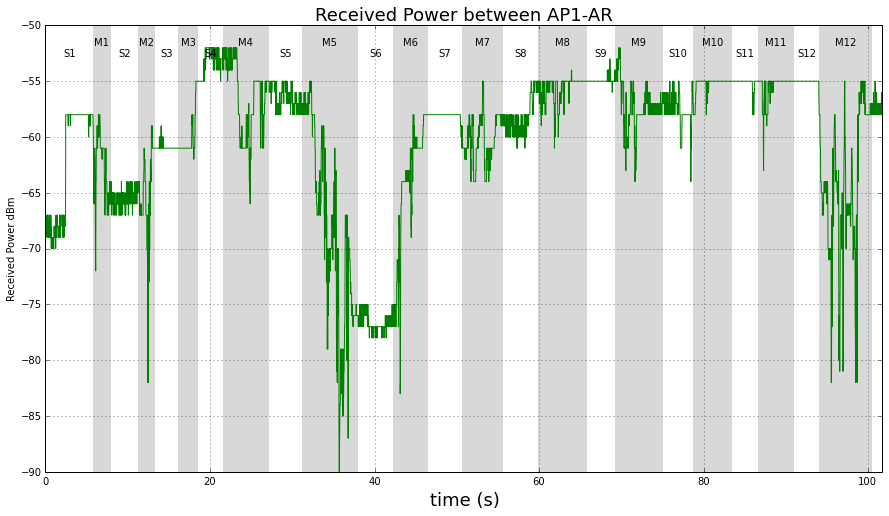

In [92]:
fig=figure(figsize=(15,8))
f,ax = S.plot(1,16,fig=fig)
S.pltmob(fig=f,ax=ax)
ax.set_xlabel('time (s)',fontsize=18)

The 2 aforementionned methods can also be used simultaneously as shown in the following example :

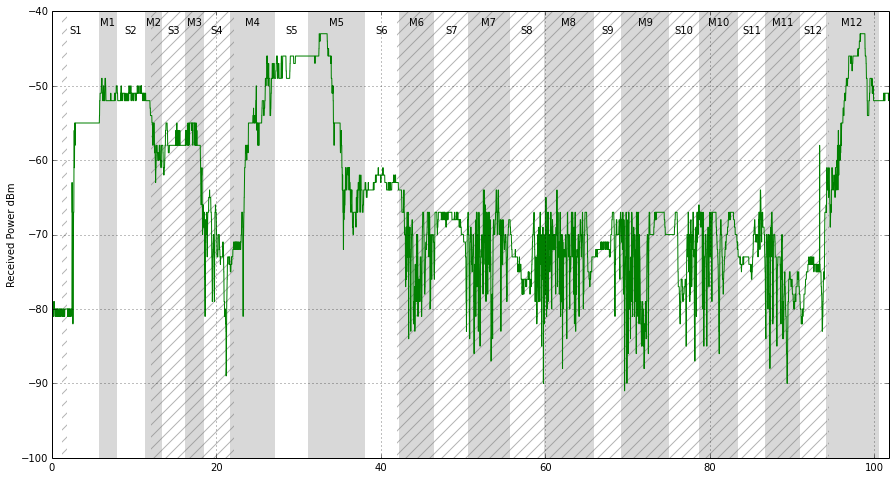

In [97]:
# plot data in green)
f,ax=S.plthkb(1,13,figsize=(15,8))
# plot optical occultation (hatched lines)
S.pltvisi(1,13,fig=f,ax=ax)
# plot subject mobility (grey areas)
f,a=S.pltmob(showvel=False,ylim=([-100,-40]),fig=f,ax=ax,title=True)

<a id='3Dplot'></a>
### 3D plot (S._show3)

Using the Mayavi package, the **CorSer** class allows to display in 3D :

+ The building where measurements have taken place
+ The positions of Vicon Cameras
+ The **Multi-cylinder** representation of the the subjects involved in the selected serie
+ The position/ antenna pattern of the devices on the body(ies) and in the infrastructure.


By default, the use of the *S._show3* method display the complete scene with body(ies) and associated devices at 4 different timestamp

/home/uguen/anaconda/lib/python2.7/site-packages/traits/has_traits.py:1766: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  setattr( self, name, value )


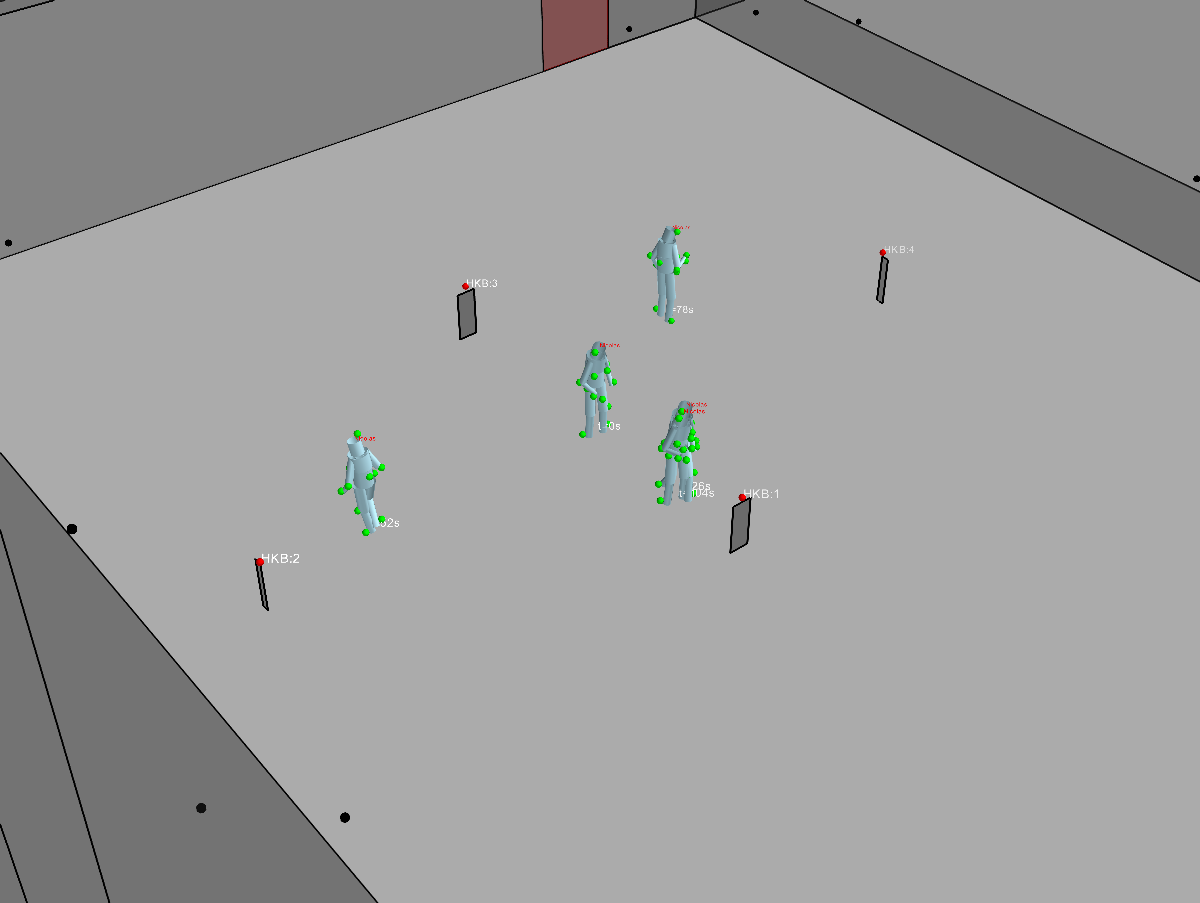

In [8]:
S._show3()

# the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig1')

#### Specify time (*bodytime* parameter)

In order to display scene at specific timestamps, the parameter *bodytime* can be used

Example: to show the body position at $t=0s$, $t=30s$ and $t=90s$.


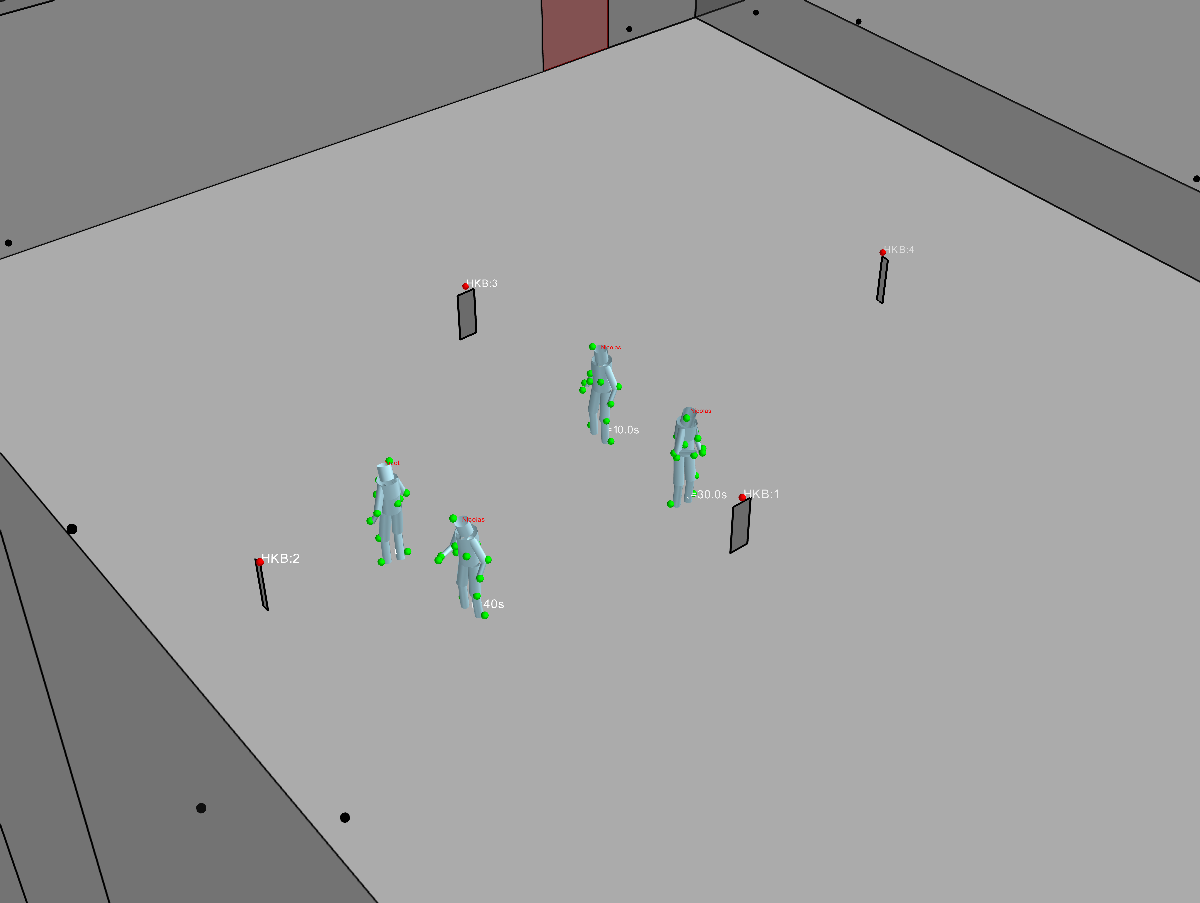

In [107]:
S._show3(bodytime=[10.,30.,40,50])

# the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig2')

#### display trajectory (*trajectory* parameter)


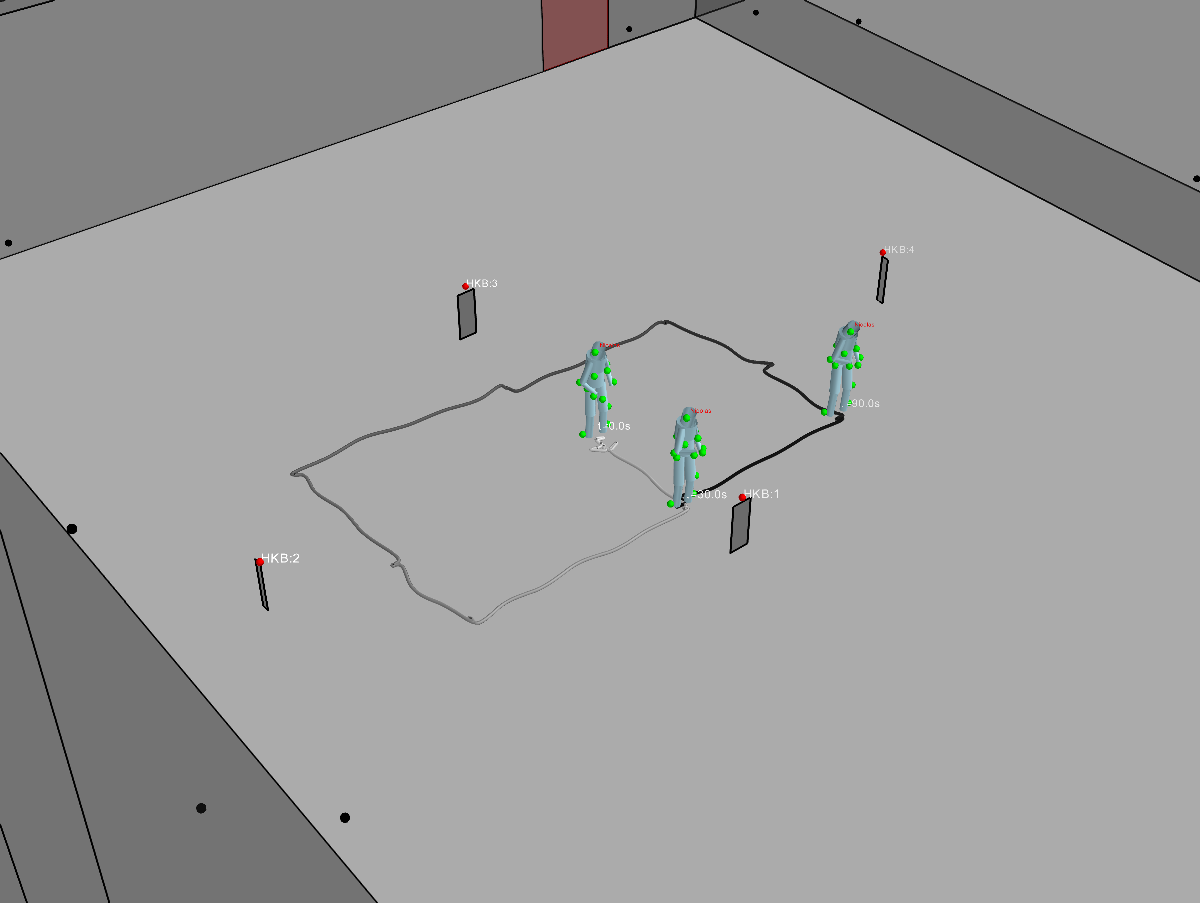

In [23]:
S._show3(trajectory = True,bodytime=[0.,30.,90.])

# the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig3')

<a id='3Dploti'></a>
### 3D plot interactive (*S._show3i*)

The method *S._show3i()* allows to display the 3D scene with an extra window incluying a slider acting like a jog shuttle, to choose the timestamp to vizualize.

Note : This function is note available in the notebook


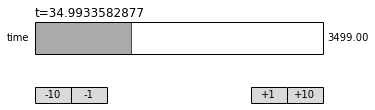

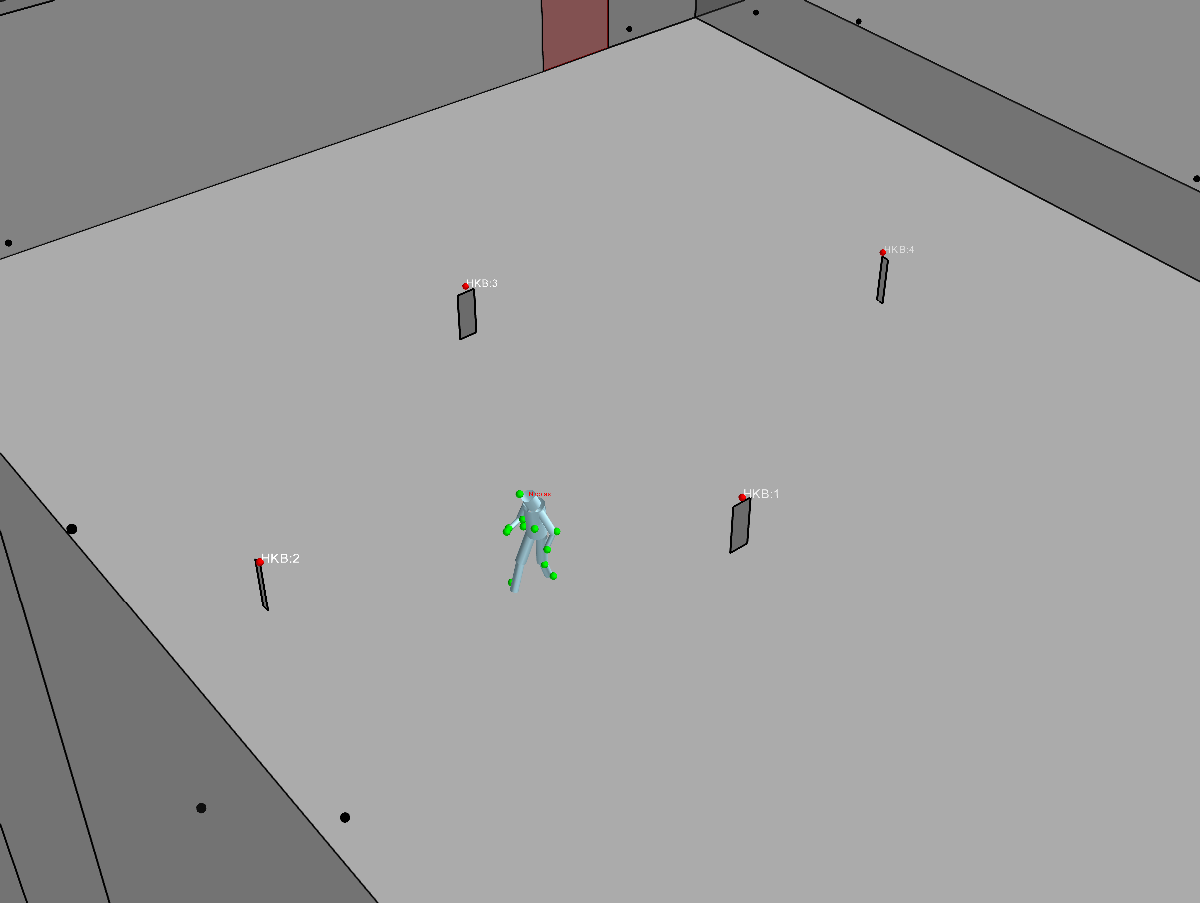

In [25]:
S._show3i(t=35) # t=35 is an initialization value

# the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig4')

<a id='visii'></a>
### Interactive visibility (*S.imshowvisibility_i*)

The visibility matrix can be displayed simultaneously to the 3D view.

For that purpose a visibility/occultation matrix is computed the first time the vizualization is called.
The following code displays the tisibility matrix and associated 3D scene at the inital time $t=35s$


Visibility is computed only once, Please wait

processing shadowing from  Nicolas


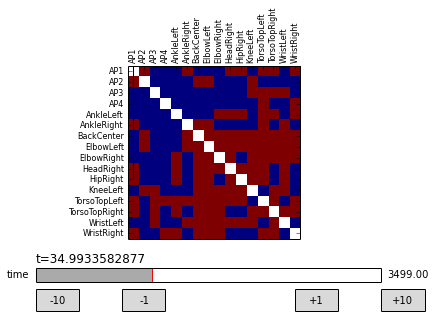

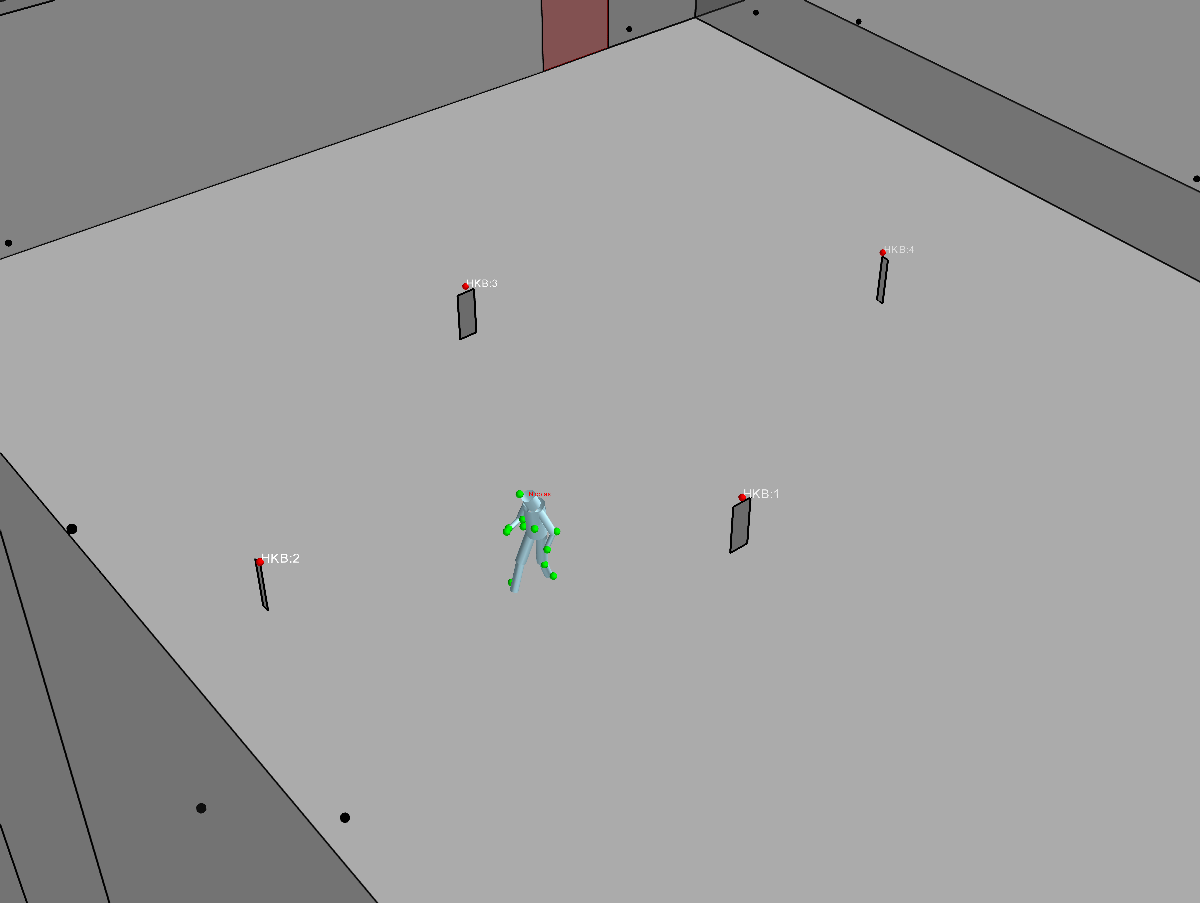

In [26]:
S.imshowvisibility_i(t=35)

# the following line is only used to display in the notebook a screenshot of the mayavi window
myu.inotshow('fig5')

## Using Pylayers Ray-tracing with CorSer data

Coming soon ...

In [28]:
import pylayers.simul.simultraj as st

In [29]:
ST=st.Simul(S)

KeyError: 'hikob'

In [2]:
from IPython.display import display, HTML
s = """

<style>

.rendered_html {
    font-family: "proxima-nova", helvetica;
    font-size: 150%;
    line-height: 1.3;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: #015C9C;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}

.rendered_html h2 {
    margin: 1.1em 0em 0.5em;
    color: #26465D;
    line-height: 1.2;
}

.rendered_html h3 {
    margin: 1.1em 0em 0.5em;
    color: #002845;
    line-height: 1.2;
}

.rendered_html li {
    line-height: 1.5; 
}

.prompt {
    font-size: 120%; 
}

.CodeMirror-lines {
    font-size: 120%; 
}

.output_area {
    font-size: 120%; 
}

notebook {
    background-image: url('files/images/background.png');
}

h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h3.point {
    font-size: 200%;
    text-align: center;
    margin: 2em 0em 2em 0em;
    #26465D
}

.logo {
    margin: 20px 0 20px 0;
}

a.anchor-link {
    display: none;
}

h1.title { 
    font-size: 250%;
}

</style>
"""
display(HTML(s))